In [1]:
import pandas as pd
import sys
import os
if not sys.modules.get('pyarrow'):
    os.system('pip3 install pyarrow')
import numpy as np
from glob import glob
import datetime 
from dateutil.relativedelta import relativedelta
from collections import Counter
import numpy as np
from sklearn import metrics
import numpy as np
import operator


In [2]:
def month_vouch(m):
    if len(str(m))==1:
        return '0'+str(m)
    else:
        return str(m)

In [3]:
def pearson_cor(a,b):   
    if a.shape != b.shape:
        print('크기가 다른 데이터입니다.')            
    else:
        return((np.dot(a,b) - np.mean(a)*np.mean(b)*a.shape[0])/(a.shape[0]-1))/(np.std(a)*np.std(b))

In [4]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [5]:
from sklearn.linear_model import LogisticRegression
if not sys.modules.get('xgboost'):
    os.system('pip3 install xgboost')
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

In [6]:
stock_code = '021240'
path = './data/freq2/naver_{0}_freq.parquet/'.format(stock_code)
file_name = os.listdir(path)[0]
data = pd.read_parquet(path+file_name)
#data['date'] = pd.to_datetime(data['date'], format='%Y.%m.%d', errors='ignore')
tag_dict= Counter()
all_dict = Counter()

In [7]:
data_sorting = data.sort_values(by='date')
data_sorting.reset_index(inplace=True,drop=True)

In [8]:
# for columns in data_sorting.columns:
#     if columns.find('기도')>=0:
#         print(columns)

# 고려해야할 것
- 각 컬럼의 총 빈도를 계산하여 특정 빈도 이하는 제거
- 날짜 짝짓기
- 전날과 당일 빈도 묶기 - 주말,휴일 고려 

In [9]:
#특정 이하 빈도 제거 
sum_by_columns = data_sorting.drop(columns=['date']).sum(axis=0)
abs_path = os.path.abspath('../file_list/crawl_data/naver_{0}.csv'.format(stock_code))
csv_file = pd.read_csv(abs_path,header=None)
#print(csv_file.head(10))
filter_size = csv_file.shape[0]*0.02
filtered_index_series = sum_by_columns>filter_size
filtered_index = filtered_index_series[filtered_index_series==True].keys()
#date_list = ['date']
#data['date'].concat(sum_by_columns>filter_size)

#data_filter_freq = data_sorting.loc[:date_list.extend(filtered_index)]
data_filter_freq = data_sorting.loc[:,filtered_index]
# 수익률과 날짜를 맞춰주기 위해서 하루를 미뤄준다.

#day를 더해줬던 이유가 무엇일까?
data_filter_freq.index = data_sorting['date'].apply(lambda x:datetime.datetime(int(x.split('.')[0]),int(x.split('.')[1]),int(x.split('.')[2]))+relativedelta(days=1))
data_filter_freq = data_filter_freq.loc[:datetime.datetime(2018,11,30)]

In [10]:
# for columns in data_filter_freq.columns:
#     if columns.find('김가')>=0:
#         print(columns)

In [11]:
data_filter_freq.tail()

,!!/sf,!/sf,........................./se,......................../se,......................./se,....................../se,...................../se,..................../se,.................../se,................../se,...,홀딩/nng,홀딩스/nng,확보/nng,확인/nng,환율/nng,회사/nng,회장/nng,후/nng,휴맥/nng,힘/nng
date,,,,,,,,,,,,,,,,,,,,,
2018-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-11-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data_filter_freq_ori = data_filter_freq

In [13]:
#### 보류
#날짜 짝짓기
#첫행 처리는 어떻게 할것인가? 없으면 더해주지 않는다. 있으면 더한다. 

In [14]:
# 7월 30일 데이터는 없다.
#data_filter_freq.loc[datetime.datetime(year=2017,month=7,day=30),:]

In [15]:
### 수익률 데이터 처리
earning_month_raw = pd.read_excel('./data/코웨이수익률.xlsx')
earning_month_raw.index = earning_month_raw['date']
del earning_month_raw['date']
earning_data = earning_month_raw.loc[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30),'return']
# 해당 열 추출
# symbol = earning_month_raw.loc[:,'A'+stock_code]
# return_data =symbol
# earning_data = return_data[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]
#earning_data = earning_month_raw[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]

In [16]:
### 수익률 데이터 처리
# stock_code = '015760'
# earning_month_raw = pd.read_excel('./data/현대차,한전_수익률.xlsx')
# # 해당 열 추출
# symbol = earning_month_raw.loc[:,'A'+stock_code]
# return_data =symbol

# earning_data = return_data[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]


In [17]:
# ### 수익률 데이터 처리
# earning_month_raw = pd.read_excel('./data/일일수익률.xlsx')

# symbol = earning_month_raw.loc['Symbol Name':,:]
# symbol.columns = earning_month_raw.loc['Symbol']

# # 해당 열 추출
# return_data = symbol['A'+stock_code]


# earning_data = return_data[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]


In [18]:
earning_data.head()

date
2017-06-08    1
2017-06-09    1
2017-06-12    1
2017-06-13    0
2017-06-14    0
Name: return, dtype: int64

In [19]:
len(earning_data)

358

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
earning_data_ori = earning_data

In [22]:
len(earning_data_ori)

358

In [23]:
figure_data=pd.read_excel('./data/코웨이수익률(숫자).xlsx')

In [24]:
figure_data.columns

Index(['수익률(%)'], dtype='object')

In [25]:
fig_data = figure_data.loc['2017-06-08':'2018-11-30','수익률(%)']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


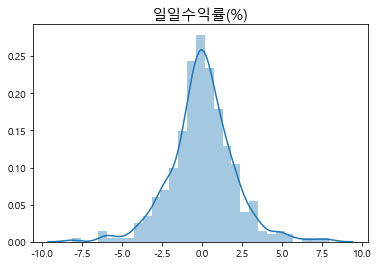

In [26]:
plt.title('일일수익률(%)',fontsize=15)
sns.distplot(list(fig_data[fig_data>-20]))

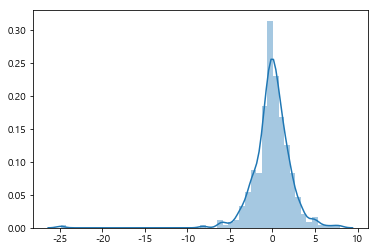

In [27]:
sns.distplot(list(fig_data))

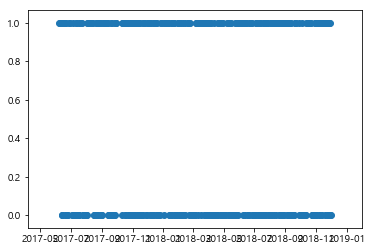

In [28]:
plt.scatter(earning_data.index,earning_data) #일일 변화율은 안정적인 편이다.

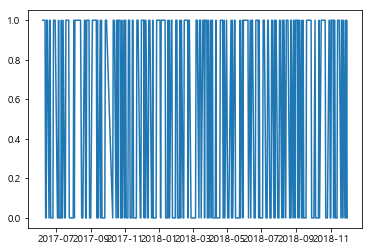

In [29]:
plt.plot(earning_data)

In [30]:
# earning_data의 전날 텍스트 빈도와 earning_data의 수익률의 짝을 맞춰야한다. 
# 주말과 휴일을 고려해야한다.
# 합치기 위해서는 earning_data의 index 정보가 필요하다.

#earning_data.index =  [date- relativedelta(days=1) for date in earning_data.index]

In [31]:
earning_data.tail()

date
2018-11-26    0
2018-11-27    1
2018-11-28    0
2018-11-29    1
2018-11-30    0
Name: return, dtype: int64

In [32]:
# 이 날짜에 있는 빈도를 수익률과 상관계수를 구할거임
data_filter_freq.index 

DatetimeIndex(['2017-06-08', '2017-06-09', '2017-06-11', '2017-06-13',
               '2017-06-16', '2017-06-18', '2017-06-23', '2017-06-29',
               '2017-06-30', '2017-07-04',
               ...
               '2018-11-17', '2018-11-20', '2018-11-22', '2018-11-23',
               '2018-11-24', '2018-11-25', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30'],
              dtype='datetime64[ns]', name='date', length=288, freq=None)

In [33]:
# print(differ_date[:10])

In [34]:
# a = differ_date[0:2]
# a.append('babo')

In [35]:
# differ_date

In [36]:
data_filter_freq.shape

(288, 501)

In [37]:
########### 안되는 이유: 컬럼 갯수가 계속해서 줄어 들기 때문에 idx가 줄어든 갯수를 넘어가면 out of index bound 에러가 난다.
# for idx in range(data_filter_freq.shape[1]):
#     print(idx)
#     tag = data_filter_freq.iloc[:,idx]    
#     tag_name = tag.name
#     print(tag_name)
#     #print(data_filter_freq.columns)
#     if tag_name == './sf'or tag_name.find('/sw')>=0 or tag_name.find('/sn')>=0:
#         #del data_filter_freq.iloc[:,idx]
#         data_filter_freq.drop(columns=tag_name,inplace=True,axis=1)

In [38]:
#필요 없다고 생각되는 태그 제거

delete_column_list = []
for idx in range(data_filter_freq.shape[1]):
    
    tag = data_filter_freq.iloc[:,idx]    
    tag_name = tag.name    
    
    if tag_name == './sf'or tag_name.find('/sw')>=0 or tag_name.find('/sn')>=0:
        delete_column_list.append(tag_name)
        
data_filter_freq.drop(columns=delete_column_list,inplace=True,axis=1)
    
    
    
    
    
    



In [39]:
differ_date = sorted(list(set(data_filter_freq.index).difference(set(earning_data.index))))
#print(differ_date)
i = 0
for idx in range(len(differ_date)-1):
    #print(element)
    # 10 11 17 idx = 1
    if (differ_date[idx+1]-differ_date[idx]).days > 1:      
        #print(differ_date[i],differ_date[idx+1],data_filter_freq.loc[differ_date[i:idx+1],:].sum())
        # 휴일 or 주말이 끼면 그 날을 포함해서 다음 날에 반영한다.
        # 휴일 다음날 
        append_idx = differ_date[idx]+relativedelta(days=1)
        sum_list = differ_date[i:idx+1]
        sum_list.append(append_idx)
        data_filter_freq.loc[append_idx,:] = data_filter_freq.loc[sum_list,:].sum()//len(sum_list)
        data_filter_freq.drop(index = differ_date[i:idx+1],inplace=True)
        #del data_filter_freq.loc[differ_date[i:idx+1],:]
        #print(sum_list,'append_idx:',append_idx)
        i = idx+1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [40]:
print(len(data_filter_freq),len(earning_data))

247 358


In [41]:
differ_date1 = sorted(list(set(data_filter_freq.index).difference(set(earning_data.index))))

In [42]:
differ_date1

[Timestamp('2017-07-23 00:00:00'),
 Timestamp('2017-08-06 00:00:00'),
 Timestamp('2017-08-13 00:00:00'),
 Timestamp('2017-08-20 00:00:00'),
 Timestamp('2017-08-27 00:00:00'),
 Timestamp('2017-09-10 00:00:00'),
 Timestamp('2017-09-17 00:00:00'),
 Timestamp('2017-09-24 00:00:00'),
 Timestamp('2017-10-03 00:00:00'),
 Timestamp('2017-10-15 00:00:00'),
 Timestamp('2017-10-29 00:00:00'),
 Timestamp('2017-11-05 00:00:00'),
 Timestamp('2017-11-19 00:00:00'),
 Timestamp('2017-12-24 00:00:00'),
 Timestamp('2017-12-30 00:00:00'),
 Timestamp('2018-01-14 00:00:00'),
 Timestamp('2018-01-21 00:00:00'),
 Timestamp('2018-02-18 00:00:00'),
 Timestamp('2018-03-04 00:00:00'),
 Timestamp('2018-03-25 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-04-22 00:00:00'),
 Timestamp('2018-05-07 00:00:00'),
 Timestamp('2018-06-24 00:00:00'),
 Timestamp('2018-07-08 00:00:00'),
 Timestamp('2018-08-19 00:00:00'),
 Timestamp('2018-08-26 00:00:00'),
 Timestamp('2018-09-25 00:00:00'),
 Timestamp('2018-10-

In [43]:
data_filter_freq.drop(differ_date1,inplace=True,axis=0)

In [44]:
differ_date2 = sorted(list(set(earning_data.index).difference(set(data_filter_freq.index))))

In [45]:
differ_date2

[Timestamp('2017-06-14 00:00:00'),
 Timestamp('2017-06-15 00:00:00'),
 Timestamp('2017-06-20 00:00:00'),
 Timestamp('2017-06-21 00:00:00'),
 Timestamp('2017-06-22 00:00:00'),
 Timestamp('2017-06-26 00:00:00'),
 Timestamp('2017-06-27 00:00:00'),
 Timestamp('2017-07-05 00:00:00'),
 Timestamp('2017-07-06 00:00:00'),
 Timestamp('2017-07-07 00:00:00'),
 Timestamp('2017-07-10 00:00:00'),
 Timestamp('2017-07-11 00:00:00'),
 Timestamp('2017-07-14 00:00:00'),
 Timestamp('2017-07-25 00:00:00'),
 Timestamp('2017-07-26 00:00:00'),
 Timestamp('2017-07-28 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-08-07 00:00:00'),
 Timestamp('2017-08-10 00:00:00'),
 Timestamp('2017-08-14 00:00:00'),
 Timestamp('2017-08-16 00:00:00'),
 Timestamp('2017-08-17 00:00:00'),
 Timestamp('2017-08-18 00:00:00'),
 Timestamp('2017-08-21 00:00:00'),
 Timestamp('2017-08-23 00:00:00'),
 Timestamp('2017-08-24 00:00:00'),
 Timestamp('2017-08-25 00:00:00'),
 Timestamp('2017-08-

In [46]:
earning_data.drop(differ_date2, inplace=True, axis=0)

In [47]:
print(len(data_filter_freq),len(earning_data))

214 214


In [48]:
data_filter_freq.shape[0]

214

In [49]:
data_filter_freq.iloc[:int(data_filter_freq.shape[0]*0.8),:]

,!!/sf,!/sf,........................./se,......................../se,......................./se,....................../se,...................../se,..................../se,.................../se,................../se,...,홀딩/nng,홀딩스/nng,확보/nng,확인/nng,환율/nng,회사/nng,회장/nng,후/nng,휴맥/nng,힘/nng
date,,,,,,,,,,,,,,,,,,,,,
2017-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-06-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-30,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2017-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 감성 사전을 크게 두가지로 만들 것이다.
1. 분모를 해당 형태소 빈도 
2. 분모를 긍정글의 갯수/ 부정글의 갯수

1. 분모를 해당 형태소 빈도

In [50]:
split_size = 0.33

In [51]:
data_filter_freq_copy = data_filter_freq.iloc[:int(data_filter_freq.shape[0]*(1-split_size)),:]
plus_dataframe1 = pd.DataFrame(columns=data_filter_freq_copy.columns)
minus_dataframe1 = pd.DataFrame(columns=data_filter_freq_copy.columns)
plus_dict1 = pd.Series([])
minus_dict1 = pd.Series([])

In [52]:
idx = 0
for idx in range(data_filter_freq_copy.shape[0]):    
    #print(idx)
    if earning_data.iloc[idx]==1:
        #print('data_filter_freq_copy.iloc[idx,:]* 1:',data_filter_freq_copy.iloc[idx,:]* 1)
        plus_dataframe1= plus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* 1)           
    elif earning_data.iloc[idx]==0:
        minus_dataframe1 = minus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* -1)
    idx+=1

In [53]:
sum_plus1 = plus_dataframe1.sum(axis=0)
sum_filter_freq = data_filter_freq_copy.sum(axis=0)
for idx in range(len(sum_plus1)):
    plus_dict1 = plus_dict1.append(pd.Series(sum_plus1[idx]/sum_filter_freq[idx],index=[sum_plus1.index[idx]]))    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [54]:
plus_dict1.sort_values(ascending=False)

m/sl            1.000000
자료/nng          1.000000
펀드/nng          1.000000
정부/nng          1.000000
증시/nng          1.000000
전쟁/nng          1.000000
바로/mag          1.000000
전/nng           1.000000
내용/nng          1.000000
관심/nng          1.000000
재산/nng          1.000000
수수료/nng         1.000000
발생/nng          1.000000
답변/nng          1.000000
함께/mag          1.000000
급락/nng          0.933333
사/nng           0.909091
금융/nng          0.900000
확보/nng          0.896552
식/nng           0.875000
개인/nng          0.875000
자금/nng          0.866667
넘/vv            0.866667
불/xpn           0.866667
읽/vv            0.857143
곳/nng           0.846154
듯/nnb           0.818182
통하/vv           0.818182
cj/sl           0.815789
합병/nng          0.809524
                  ...   
정수기/nng         0.185185
ㅋ/ic            0.181818
해외/nng          0.166667
외인/nng          0.166667
다음/nng          0.000000
연금/nng          0.000000
go/sl           0.000000
시스템/nng         0.000000
금지/nng          0.000000


In [55]:
sum_minus1 = minus_dataframe1.sum(axis=0)
sum_filter_freq = data_filter_freq_copy.sum(axis=0)
for idx in range(len(sum_minus1)):
    minus_dict1 = minus_dict1.append(pd.Series(sum_minus1[idx]/sum_filter_freq[idx],index=[sum_minus1.index[idx]]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [56]:
minus_dict1.sort_values(ascending=True)

petitions/sl   -1.000000
com/sl         -1.000000
미국/nnp         -1.000000
청/nng          -1.000000
개선/nng         -1.000000
www/sl         -1.000000
president/sl   -1.000000
청원/nng         -1.000000
금지/nng         -1.000000
시스템/nng        -1.000000
go/sl          -1.000000
연금/nng         -1.000000
다음/nng         -1.000000
외인/nng         -0.833333
해외/nng         -0.833333
ㅋ/ic           -0.818182
정수기/nng        -0.814815
대/xpn          -0.800000
http/sl        -0.750000
https/sl       -0.750000
ㅋ/mag          -0.733333
그러/vv          -0.727273
공매/nng         -0.714286
위기/nng         -0.700000
어찌/mag         -0.700000
실적/nng         -0.678571
하루/nng         -0.666667
공매도/nng        -0.666667
내일/nng         -0.666667
분기/nng         -0.666667
                  ...   
사/nng          -0.090909
급락/nng         -0.066667
함께/mag          0.000000
답변/nng          0.000000
발생/nng          0.000000
수수료/nng         0.000000
재산/nng          0.000000
관심/nng          0.000000
내용/nng          0.000000


In [57]:
sentimental_score1 = (plus_dict1.sort_values(ascending=False)+ minus_dict1.sort_values(ascending=False)).sort_values(ascending=False)

In [58]:
sentimental_score1

m/sl            1.000000
전/nng           1.000000
함께/mag          1.000000
답변/nng          1.000000
발생/nng          1.000000
재산/nng          1.000000
관심/nng          1.000000
내용/nng          1.000000
수수료/nng         1.000000
바로/mag          1.000000
전쟁/nng          1.000000
증시/nng          1.000000
정부/nng          1.000000
펀드/nng          1.000000
자료/nng          1.000000
급락/nng          0.866667
사/nng           0.818182
금융/nng          0.800000
확보/nng          0.793103
식/nng           0.750000
개인/nng          0.750000
자금/nng          0.733333
넘/vv            0.733333
불/xpn           0.733333
읽/vv            0.714286
곳/nng           0.692308
듯/nnb           0.636364
통하/vv           0.636364
cj/sl           0.631579
합병/nng          0.619048
                  ...   
정수기/nng        -0.629630
ㅋ/ic           -0.636364
외인/nng         -0.666667
해외/nng         -0.666667
개선/nng         -1.000000
www/sl         -1.000000
청원/nng         -1.000000
청/nng          -1.000000
미국/nnp         -1.000000


2. 분모를 긍정글의 갯수/ 부정글의 갯수

In [59]:
data_filter_freq_copy = data_filter_freq
plus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)
minus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)

In [60]:
data_filter_freq_copy = data_filter_freq
plus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)
minus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)

In [61]:
idx = 0
for idx in range(data_filter_freq.shape[0]):    
    #print(idx)
    if earning_data.iloc[idx]==1:
        #print('data_filter_freq_copy.iloc[idx,:]* 1:',data_filter_freq_copy.iloc[idx,:]* 1)
        plus_dataframe2= plus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* 1)   
        
    elif earning_data.iloc[idx]==0:
        minus_dataframe2 = minus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* -1)
    idx+=1

In [62]:
minus_dict2=minus_dataframe2.mean(axis=0).sort_values(ascending=False)

In [63]:
plus_dict2=plus_dataframe2.mean(axis=0).sort_values(ascending=False)

In [64]:
sentimental_score2 = (plus_dataframe2.mean(axis=0).sort_values(ascending=False)+ minus_dataframe2.mean(axis=0).sort_values(ascending=False))

In [65]:
sentimental_score2

!!/sf                           0.015117
!/sf                           -0.133946
........................./se   -0.089170
......................../se    -0.035783
......................./se     -0.040184
....................../se      -0.018752
...................../se       -0.016648
..................../se         0.013395
.................../se          0.015691
................../se           0.013586
................./se           -0.015882
................/se            -0.022197
.............../se              0.159013
............../se               0.098546
............./se                0.345580
............/se                 0.270570
.........../se                  0.543628
........../se                   0.391695
........./se                    0.069843
......../se                     0.028894
......./se                      0.152889
....../se                       0.129162
...../se                        0.203980
..../se                         0.342901
.../se          

In [66]:
# dictionary 초기화
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()

y = np.array(earning_data_ori)
#y = np.array(earning_data)
#y = np.array([labeling(label) for label in earning_data])



In [67]:
y_dict = {'상승':[(sum(y)/len(y))], '하락':[(1-sum(y)/len(y))]}

In [68]:
y_dict

{'상승': [0.5373831775700935], '하락': [0.46261682242990654]}

<BarContainer object of 2 artists>

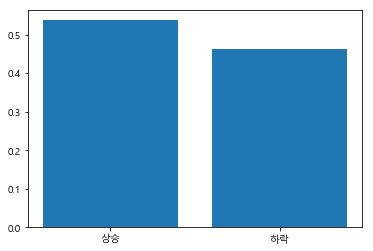

In [69]:
#pd.DataFrame.from_dict(y_dict)
plt.bar(['상승','하락'],[(sum(y)/len(y)),(1-sum(y)/len(y))])


In [70]:
# 점수를 계산한다. 
X_train_raw, X_test_raw,y_train,y_test= train_test_split(data_filter_freq,y, test_size=split_size, shuffle=False)
#X_train_index, X_test_index = train_test_split(earning_data_ori,test_size=0.33, shuffle=False)

In [71]:
data_filter_column_freq = data_filter_freq.sum(axis=0)

In [72]:
#X_train.shape

In [73]:
[(sum(y_test)/len(y_test)),(1-sum(y_test)/len(y_test))]

[0.5352112676056338, 0.46478873239436624]

In [74]:
[(sum(y_train)/len(y_train)),(1-sum(y_train)/len(y_train))]

[0.5384615384615384, 0.46153846153846156]

# 점수를 하나로만

In [75]:
# if X_train_raw.iloc[0,:].sum() == 0:
#     result = 0
#X_train_raw.iloc[0,:] != 0
#값이 존재하는 형태소 추출
X_train = pd.Series()
for train_idx in range(X_train_raw.shape[0]):
    #해당번째 열 추출
    train_iloc = X_train_raw.iloc[train_idx,:]
    #값이존재하는 형태소 추출
    select_pos = train_iloc.index[train_iloc != 0]
    # 그 형태소의 인덱스
    select_idx=[]
    for pos_idx, pos_element in enumerate(select_pos):
        for column_idx,column_element in enumerate(X_train_raw.columns):
            if column_element == pos_element:
                select_idx.append(column_idx)
    # 빈도
    select_series = X_train_raw.iloc[train_idx,select_idx]    
    #(점수 * 빈도)총합/ 빈도 
    
    X_train[train_iloc.name]=(sentimental_score1[select_pos] * select_series).mean()
X_train.fillna(0,inplace=True)



#X_train_raw.iloc[0,:]


#X_train_raw.loc[:,select_pos]
    
    
#X_train_raw.iloc[0,X_train_raw.iloc[0,:].index[X_train_raw.iloc[0,:] != 0]]
#X_train_raw.iloc[0,:] != 0
#X_train_raw.iloc[0,X_train_raw.iloc[0,:] != 0]
#/X_train_raw.iloc[0,:].sum()
# row 마다 감성사전에서 점수를 계산한다 



# 긍정부정 나눠서

In [76]:
#train 부정 전처리 함수
def train_pos_neg_processing(X_train_raw):
    X_train = pd.DataFrame(columns=['긍정','부정'])
    for train_idx in range(X_train_raw.shape[0]):
        #해당번째 열 추출
        train_iloc = X_train_raw.iloc[train_idx,:]
        #값이존재하는 형태소 추출
        select_pos = train_iloc.index[train_iloc != 0]
        # 그 형태소의 인덱스
        select_idx=[]
        for pos_idx, pos_element in enumerate(select_pos):
            for column_idx,column_element in enumerate(X_train_raw.columns):
                if column_element == pos_element:
                    select_idx.append(column_idx)
        # 빈도
        select_series = X_train_raw.iloc[train_idx,select_idx]    
        #(점수 * 빈도)총합/ 빈도 


        #plus_dict의 해당 형태소 점수를 뽑아오는 것이 목표이다.
        #indexing하면 error뜨고 
        #plus_dict에 해당 형태소가 존재하면

    #     print(select_pos)
    #     print(plus_dict[select_pos].dtype)

        plus_pos = []
        for value in select_pos:
            for element in plus_dict1.index:
                if value == element:
                    plus_pos.append(element)
        plus_idx = []            
        for pos_idx, pos_element in enumerate(plus_pos):
            for column_idx,column_element in enumerate(X_train_raw.columns):
                if column_element == pos_element:
                    plus_idx.append(column_idx)

        minus_pos = []
        for value in select_pos:
            for element in minus_dict1.index:
                if value == element:
                    minus_pos.append(element)

        minus_idx = []            
        for pos_idx, pos_element in enumerate(minus_pos):
            for column_idx,column_element in enumerate(X_train_raw.columns):
                if column_element == pos_element:
                    minus_idx.append(column_idx)


        pos_freq = X_train_raw.iloc[train_idx,plus_idx]
        pos_freq_sum = pos_freq.sum()  
        pos_score_dot_freq = np.dot(plus_dict1[plus_pos],X_train_raw.iloc[train_idx,plus_idx])
        minus_freq_sum = X_train_raw.iloc[train_idx,minus_idx].sum()
        minus_score_dot_freq = np.dot(minus_dict1[minus_pos],X_train_raw.iloc[train_idx,minus_idx])    
        X_train = X_train.append(pd.DataFrame([[pos_score_dot_freq/pos_freq_sum,(minus_score_dot_freq/minus_freq_sum)*(-1)]],columns=X_train.columns,index=[pos_freq.name]))    
    X_train.fillna(0,inplace=True)
    return X_train



In [77]:
# X_train = pd.DataFrame(columns=['긍정','부정'])
# for train_idx in range(X_train_raw.shape[0]):
#     #해당번째 열 추출
#     train_iloc = X_train_raw.iloc[train_idx,:]
#     #값이존재하는 형태소 추출
#     select_pos = train_iloc.index[train_iloc != 0]
#     # 그 형태소의 인덱스
#     select_idx=[]
#     for pos_idx, pos_element in enumerate(select_pos):
#         for column_idx,column_element in enumerate(X_train_raw.columns):
#             if column_element == pos_element:
#                 select_idx.append(column_idx)
#     # 빈도
#     select_series = X_train_raw.iloc[train_idx,select_idx]    
#     #(점수 * 빈도)총합/ 빈도 
    
    
#     #plus_dict의 해당 형태소 점수를 뽑아오는 것이 목표이다.
#     #indexing하면 error뜨고 
#     #plus_dict에 해당 형태소가 존재하면
    
# #     print(select_pos)
# #     print(plus_dict[select_pos].dtype)
    
#     plus_pos = []
#     for value in select_pos:
#         for element in plus_dict1.index:
#             if value == element:
#                 plus_pos.append(element)
#     plus_idx = []            
#     for pos_idx, pos_element in enumerate(plus_pos):
#         for column_idx,column_element in enumerate(X_train_raw.columns):
#             if column_element == pos_element:
#                 plus_idx.append(column_idx)
                
#     minus_pos = []
#     for value in select_pos:
#         for element in minus_dict1.index:
#             if value == element:
#                 minus_pos.append(element)
                
#     minus_idx = []            
#     for pos_idx, pos_element in enumerate(minus_pos):
#         for column_idx,column_element in enumerate(X_train_raw.columns):
#             if column_element == pos_element:
#                 minus_idx.append(column_idx)
    
                
# #     print('plus_pos,minus_pos',plus_pos,minus_pos)
# #     print('plus_idx,minus_idx',plus_idx,minus_idx)
#     # t시점의 형태소 빈도 * 그 형태소의 점수 /해당 시점의 형태소의 합
#     # 긍정
#     # 각 시점의 각 형태소 갯수
#     #print(X_train_raw.iloc[train_idx,plus_idx])
#     # 각 시점의 형태소 합 
#     pos_freq = X_train_raw.iloc[train_idx,plus_idx]
#     pos_freq_sum = pos_freq.sum()
#     #print(pos_freq_sum)
#     pos_score_dot_freq = np.dot(plus_dict1[plus_pos],X_train_raw.iloc[train_idx,plus_idx])
#     #print(pos_score_dot_freq)
    
#     #print(X_train_raw.iloc[train_idx,plus_idx])
#     # 각 시점의 형태소 합 
#     minus_freq_sum = X_train_raw.iloc[train_idx,minus_idx].sum()
#     #print(minus_freq_sum)
#     minus_score_dot_freq = np.dot(minus_dict1[minus_pos],X_train_raw.iloc[train_idx,minus_idx])
#     #print(minus_score_dot_freq)
#     #print(plus_dict1[plus_pos] * X_train_raw.iloc[train_idx,plus_idx]/data_filter_column_freq[plus_pos])
#     #print(pd.DataFrame([[pos_score_dot_freq/pos_freq_sum,minus_score_dot_freq/minus_freq_sum]],columns=X_train.columns,index=[pos_freq.name]))
#     X_train = X_train.append(pd.DataFrame([[pos_score_dot_freq/pos_freq_sum,minus_score_dot_freq/minus_freq_sum]],columns=X_train.columns,index=[pos_freq.name]))
#     #X_train['부정'].append(minus_dict1[minus_pos] * X_train_raw.iloc[train_idx,minus_idx]/data_filter_column_freq[minus_pos])           
    
    
    
    
#     #minus_dict에 해당 형태소가 존재하면    
    
#     #X_train[train_iloc.name,]=(sentimental_score1[select_pos] * select_series).mean()
    
    
# X_train.fillna(0,inplace=True)



In [78]:
X_train

2017-06-08    0.150000
2017-06-09    0.119581
2017-06-13    0.228484
2017-06-16    0.099645
2017-06-23    0.000000
2017-06-30    0.000000
2017-07-04    0.000000
2017-07-12   -0.027279
2017-07-13    0.105950
2017-07-18    0.018441
2017-07-19    0.110972
2017-07-20    0.113920
2017-07-21    0.270703
2017-07-24    0.140524
2017-07-27    0.527896
2017-08-02    0.237239
2017-08-03    0.130956
2017-08-04    0.161855
2017-08-08   -0.024414
2017-08-09    0.000000
2017-08-11    0.102669
2017-08-22    0.371373
2017-08-30    0.191057
2017-09-01    0.171471
2017-09-06    0.380492
2017-09-07    0.179712
2017-09-15    0.166667
2017-09-19    0.285046
2017-09-27    0.000000
2017-09-28    0.172454
                ...   
2018-05-14    0.447537
2018-05-15    1.045664
2018-05-16    0.145313
2018-05-17    0.200239
2018-05-18    1.318618
2018-05-21    0.635222
2018-05-23    0.316793
2018-05-24    0.489773
2018-05-25    0.071806
2018-05-28    0.302766
2018-05-29    0.549963
2018-05-30    0.207325
2018-05-31 

In [79]:
X_train = train_pos_neg_processing(X_train_raw)
X_test = train_pos_neg_processing(X_test_raw)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


In [80]:
X_train.shape

(143, 2)

In [81]:
y_train.shape

(143,)

In [510]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
precision_score_result=Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = (RFC,rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
nfolds=5
criterion = ["gini", 'entropy']
#grid_search = (SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000]
learning_rate = [0.01]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]


#gsExtC = (ExtraTreesClassifier, ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
classifiers.append(SVC(random_state=4000))
classifiers.append(RandomForestClassifier(random_state=4000))
classifiers.append(ExtraTreesClassifier(random_state=4000))
classifiers.append(GradientBoostingClassifier(random_state=4000))

classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(penalty='l2',random_state=4000))

classifiers.append(XGBClassifier(random_state=4000))
classifiers.append(LinearSVC(random_state=4000))
classifiers.append(MLPClassifier(random_state=4000))









#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
precision_score_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    pre = models.predict(X_test)
    
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
precision_score_result[stock_code]=precision_score_list



X_train_shape: (143, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\

In [511]:
model_list=['SVC',
'RandomForest',
'ExtraTrees',
'GradientBoosting',
'Kneighbors',
'Logistic',
'XGBoost',
'LinearSVC',
'MLP']

In [512]:
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = confusion_matrix_result[stock_code][idx]['GridSearchCV']
#     confusion_matrix_result[stock_code][idx] = tmp_dict
# print(confusion_matrix_result)
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = model_result[stock_code][idx]['GridSearchCV']
#     model_result[stock_code][idx] = tmp_dict
# print(model_result)
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = train_result[stock_code][idx]['GridSearchCV']
#     train_result[stock_code][idx] = tmp_dict
# print(train_result)
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = test_result[stock_code][idx]['GridSearchCV']
#     test_result[stock_code][idx] = tmp_dict
# print(test_result)
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = precision_score_result[stock_code][idx]['GridSearchCV']
#     precision_score_result[stock_code][idx] = tmp_dict
# print(precision_score_result)     
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = precision_train_result[stock_code][idx]['GridSearchCV']
#     precision_train_result[stock_code][idx] = tmp_dict
# print(precision_score_result)   

In [513]:
a = {'RandomForestClassifier':1}
for element in a.keys():
    print(element[:element.find('Classifier')])

RandomForest


In [514]:
train_accuracy_list

[{'SVC': 0.5384615384615384},
 {'RandomForestClassifier': 0.9090909090909091},
 {'ExtraTreesClassifier': 0.965034965034965},
 {'GradientBoostingClassifier': 0.9300699300699301},
 {'KNeighborsClassifier': 0.7342657342657343},
 {'LogisticRegression': 0.5524475524475524},
 {'XGBClassifier': 0.7832167832167832},
 {'LinearSVC': 0.6433566433566433},
 {'MLPClassifier': 0.6083916083916084}]

In [515]:
for element in train_accuracy_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]

In [516]:
train_accuracy_list

[{'SVC': 0.5384615384615384},
 {'RF': 0.9090909090909091},
 {'ET': 0.965034965034965},
 {'GB': 0.9300699300699301},
 {'KNN': 0.7342657342657343},
 {'LR': 0.5524475524475524},
 {'XGB': 0.7832167832167832},
 {'LSVC': 0.6433566433566433},
 {'MLP': 0.6083916083916084}]

In [517]:
train_dict=Counter()
for element in train_accuracy_list:
    train_dict.update(element)

train_keys=sorted(train_dict,key=lambda x:train_dict[x],reverse=True)
train_values=sorted(train_dict.values(),reverse=True)

In [518]:
color_dict= dict(zip(train_dict.keys(),sns.color_palette("hls", len(classifiers)+len(classifiers_not))))
color_dict

{'SVC': (0.86, 0.3712, 0.33999999999999997),
 'RF': (0.86, 0.7178666666666667, 0.33999999999999997),
 'ET': (0.6554666666666664, 0.86, 0.33999999999999997),
 'GB': (0.33999999999999997, 0.86, 0.3712),
 'KNN': (0.33999999999999997, 0.86, 0.7178666666666667),
 'LR': (0.33999999999999997, 0.6554666666666664, 0.86),
 'XGB': (0.3712, 0.33999999999999997, 0.86),
 'LSVC': (0.7178666666666661, 0.33999999999999997, 0.86),
 'MLP': (0.86, 0.33999999999999997, 0.6554666666666664)}

In [519]:
train_keys

['ET', 'GB', 'RF', 'XGB', 'KNN', 'LSVC', 'MLP', 'LR', 'SVC']

In [520]:
train_legend = ['ExtraTree','GradientBoost','RandomForest','XGBoost','KNN','LinearSVC','MLP','LogisticRegression','SVC']

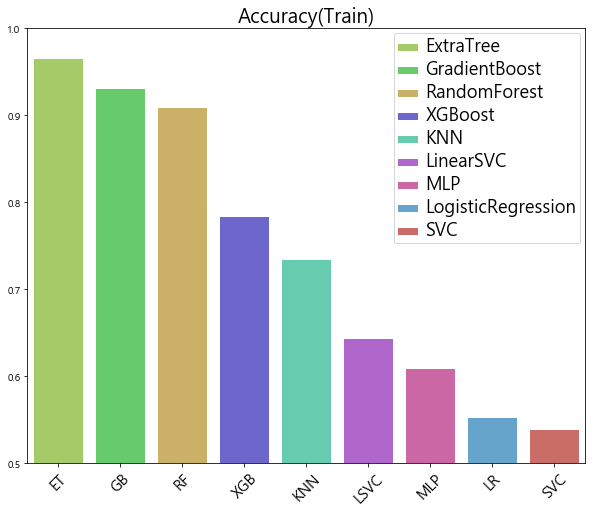

In [521]:
plt.figure(figsize=(10,8))
plt.title('Accuracy(Train)',fontsize = 20)
plt.xticks(rotation=45,fontsize=15)
plt.ylim((0.5,1))

ax = sns.barplot(train_keys,train_values,palette=[color_dict[key] for key in train_keys],hue=train_legend)
plt.setp(ax.get_legend().get_texts(), fontsize='18')
sns.barplot(train_keys,train_values,palette=[color_dict[key] for key in train_keys]) # 그래프가 바뀌어도 분류기에 대한 색깔이 변치 않기위해

In [522]:
for element in test_accuracy_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]

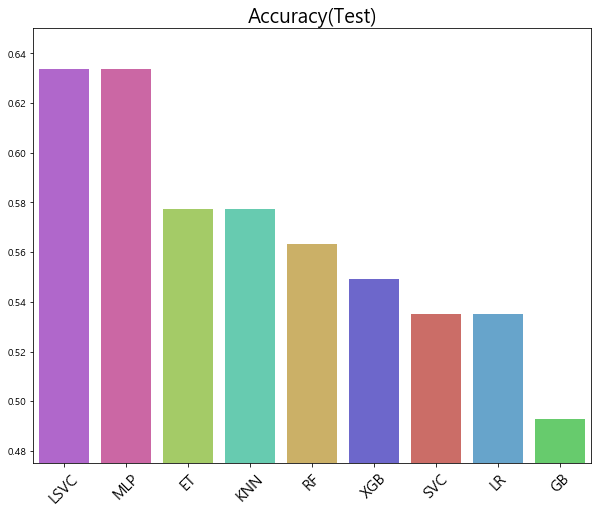

In [523]:
test_dict=Counter()
for element in test_accuracy_list:
    test_dict.update(element)
test_keys=sorted(test_dict.keys(),key=lambda x:test_dict[x],reverse=True)
test_values=sorted(test_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Accuracy(Test)',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.ylim((0.475,0.65))
sns.barplot(test_keys,test_values,palette=[color_dict[key] for key in test_keys])#lsvc mlp gnb/ bnb

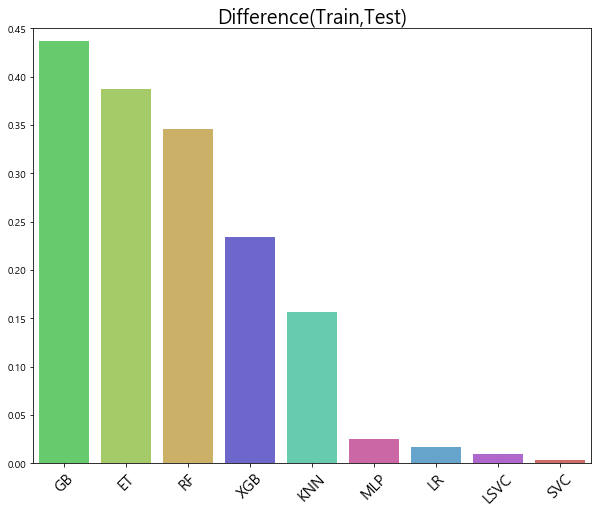

In [524]:
train_test1 = train_dict - test_dict
train_test2 =  test_dict - train_dict
train_test1.update(train_test2)
train_test_dict = train_test1
test_keys=sorted(train_test_dict.keys(),key=lambda x:train_test_dict[x],reverse=True)
test_values=sorted(train_test_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Difference(Train,Test)',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.ylim((0,0.45))

sns.barplot(test_keys,test_values,palette=[color_dict[key] for key in test_keys])#gb et rf xgb knn

In [311]:
for element in precision_score_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]

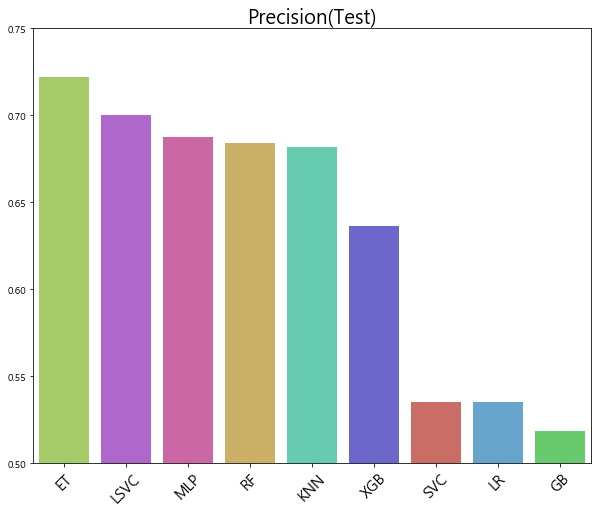

In [312]:
precision_score_dict={}
for element in precision_score_list:
    precision_score_dict.update(element)
precision_score_keys=sorted(precision_score_dict.keys(),key=lambda x:precision_score_dict[x],reverse=True)
precision_score_values=sorted(precision_score_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Precision(Test)',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.ylim((0.5,0.75))
sns.barplot(precision_score_keys,precision_score_values,palette=[color_dict[key] for key in precision_score_keys])

In [313]:
train_dict

Counter({'SVC': 0.5384615384615384,
         'RF': 0.9090909090909091,
         'ET': 0.965034965034965,
         'GB': 0.9300699300699301,
         'KNN': 0.7342657342657343,
         'LR': 0.5524475524475524,
         'XGB': 0.7832167832167832,
         'LSVC': 0.6433566433566433,
         'MLP': 0.6083916083916084})

In [314]:
test_dict

Counter({'SVC': 0.5352112676056338,
         'RF': 0.5633802816901409,
         'ET': 0.5774647887323944,
         'GB': 0.49295774647887325,
         'KNN': 0.5774647887323944,
         'LR': 0.5352112676056338,
         'XGB': 0.5492957746478874,
         'LSVC': 0.6338028169014085,
         'MLP': 0.6338028169014085})

In [315]:
precision_score_dict

{'SVC': 0.5352112676056338,
 'RF': 0.6842105263157895,
 'ET': 0.7222222222222222,
 'GB': 0.5185185185185185,
 'KNN': 0.6818181818181818,
 'LR': 0.5352112676056338,
 'XGB': 0.6363636363636364,
 'LSVC': 0.7,
 'MLP': 0.6875}

In [316]:
from sklearn.model_selection import TimeSeriesSplit
from collections import Counter

### scaling 이전 start

# 상위모델 선정O

In [535]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
precision_score_result=Counter()
precision_train_result = Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
#nfolds=5
nfolds=TimeSeriesSplit(n_splits=6)
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000,5000]
learning_rate = [0.01,0.001]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]
linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }

svc_param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel, 'random_state':random_state }

ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


gb_param_grid = {'loss' : ["deviance",'exponential'],
              'n_estimators' : n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'min_samples_leaf': [200,400,600],
              'max_features': [0.3, 0.1], 'random_state':random_state  
              }

rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }

logistic_param_grid = {
    'C': Cs                                   
              }

lda_param_grid = {'solver' : ["svd",'lsqr','eigen'],
              'shrinkage ' : ['auto'], 'random_state':random_state 
              }

kneighbor_param_grid = {'n_neighbors':list(range(1,23))}

xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,10)],
     'subsample':[i/100.0 for i in range(75,100,5)],     
    #'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100,1000],
    'n_estimators':n_estimators, 'random_state':random_state,
    'learning_rate' :learning_rate
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05,0.1,1,10,100],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000,2000,5000,10000], 'random_state':random_state 
}


#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
#gb et rf xgb knn
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(GradientBoostingClassifier(),param_grid = gb_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(XGBClassifier(),param_grid=xgboost_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
#classifiers.append(GridSearchCV(SVC(), svc_param_grid, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))

#classifiers.append(GridSearchCV(MLPClassifier(),mlp_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers_not.append(LogisticRegression(penalty='l2',random_state=4000))
classifiers_not.append(LinearSVC(random_state=4000))
classifiers_not.append(MLPClassifier(random_state=4000))
classifiers_not.append(SVC(random_state=4000))
                   

#lsvc mlp gnb/ bnb


#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
precision_score_list = []
precision_train_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))  
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
precision_score_result[stock_code]=precision_score_list
precision_train_result[stock_code]=precision_train_list



X_train_shape: (143, 2)
GridSearchCV : {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'n_estimators': 500, 'random_state': 4000}
GridSearchCV : {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'n_estimators': 1000, 'random_state': 4000}
GridSearchCV : {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.3, 'min_samples_leaf': 200, 'n_estimators': 500, 'random_state': 4000}
GridSearchCV : {'gamma': 0.3, 'learning_rate': 0.001, 'n_estimators': 500, 'random_state': 4000, 'subsample': 0.9}
GridSearchCV : {'n_neighbors': 5}
LogisticRegression : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=4000, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
LinearSVC : LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [536]:
# model_result = Counter()
# train_result= Counter()
# test_result = Counter()
# confusion_matrix_result = Counter()
# auc_result = Counter()
# precision_score_result=Counter()
# precision_train_result = Counter()
# lenx=X_train.shape
# # if lenx[0]<=10 or lenx[1]<=2:
# #     continue
# classifiers = []
# classifiers_not = []
# random_state = [4000]



# # gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
# Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# gammas = [0.001, 0.01, 0.1, 1]
# kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
# #nfolds=5
# nfolds=TimeSeriesSplit(n_splits=5)
# criterion = ["gini", 'entropy']
# #grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
# n_estimators = [500,1000,2000]
# learning_rate = [0.01]
# max_depth = [3, 5, 10, 15 ,20]
# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# scoring = 'accuracy'
# n_jobs= -1
# penalty= ['l2']
# max_features = [2]
# linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }

# svc_param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel, 'random_state':random_state }

# ex_param_grid = {"max_depth": [3, 5, 10,15,20],
#               "max_features": max_features,
#               "bootstrap": [False,True],
#               "n_estimators" :n_estimators,
#               "criterion": criterion, 'random_state':random_state }


# gb_param_grid = {'loss' : ["deviance",'exponential'],
#               'n_estimators' : n_estimators,
#               'learning_rate': learning_rate,
#               'max_depth': max_depth,
#               'min_samples_leaf': [200,400,600],
#               'max_features': [0.3, 0.1], 'random_state':random_state  
#               }

# rf_param_grid = {"max_depth": [3,4,5,10,15,20],
#               "max_features": max_features,
#               "n_estimators" :n_estimators,
#               "criterion": criterion, 'random_state':random_state }

# logistic_param_grid = {
#     'C': Cs                                   
#               }

# lda_param_grid = {'solver' : ["svd",'lsqr','eigen'],
#               'shrinkage ' : ['auto'], 'random_state':random_state 
#               }

# kneighbor_param_grid = {'n_neighbors':list(range(1,31))}

# xgboost_param_grid ={
#     'gamma':[i/10.0 for i in range(0,10)],
#      'subsample':[i/100.0 for i in range(75,100,5)],     
#     #'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100,1000],
#     'n_estimators':n_estimators, 'random_state':random_state,
#     'learning_rate' :learning_rate
# }

# mlp_param_grid = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['logistic', 'tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05,0.1,1,10,100],
#     'learning_rate': ['constant','adaptive'],
#     'max_iter':[1000,2000,5000,10000], 'random_state':random_state 
# }


# #gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

# print('X_train_shape:',X_train.shape)
# #gb et rf xgb
# classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
# classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
# #classifiers.append(GridSearchCV(GradientBoostingClassifier(),param_grid = gb_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
# classifiers.append(GridSearchCV(XGBClassifier(),param_grid=xgboost_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))

# #classifiers_not.append(LinearSVC(random_state=4000))
# #classifiers_not.append(MLPClassifier(random_state=4000))


# #lsvc mlp gnb/ bnb


# #classifiers.append(XGBClassifier())
# test_accuracy_list = []
# train_accuracy_list= [] 
# model_accuracy_list= []
# confusion_matrix_list = []
# precision_score_list = []
# precision_train_list = []
# auc_list = []
# for models in classifiers:
#     #print(models)
#     models.fit(X_train,y_train)
    
#     model_str = str(models).split('(')[0]
#     print(model_str,':',models.best_params_)
#     pre = models.predict(X_test)
    
#     tmp_dict1 = {}
#     tmp_dict1[model_str] = models.score(X_test,y_test)
#     test_accuracy_list.append(tmp_dict1)
    
#     tmp_dict2 = {}
#     tmp_dict2[model_str] = models.score(X_train,y_train)
#     train_accuracy_list.append(tmp_dict2)
    
#     tmp_dict3 = {}
#     tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
#     model_accuracy_list.append(tmp_dict3)
    
#     # 전역변수로, 지역변수 문제라 생각한다.
#     tmp_dict4 = {}
#     tmp_dict4[model_str] = confusion_matrix(y_test,pre)
#     confusion_matrix_list.append(tmp_dict4)
    
#     tmp_dict5 ={}
#     tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
#     precision_score_list.append(tmp_dict5)
#     #confusion_matrix_list.append(confusion_matrix(y_test,pre))    
#     #confusion_matrix_list.append(confusion_matrix(y_test,pre))  
# for models in classifiers_not:
    
#     models.fit(X_train,y_train)
    
#     model_str = str(models).split('(')[0]
#     print(model_str,':',models)
#     pre = models.predict(X_test)
    
#     tmp_dict1 = {}
#     tmp_dict1[model_str] = models.score(X_test,y_test)
#     test_accuracy_list.append(tmp_dict1)
    
#     tmp_dict2 = {}
#     tmp_dict2[model_str] = models.score(X_train,y_train)
#     train_accuracy_list.append(tmp_dict2)
    
#     tmp_dict3 = {}
#     tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
#     model_accuracy_list.append(tmp_dict3)
    
#     # 전역변수로, 지역변수 문제라 생각한다.
#     tmp_dict4 = {}
#     tmp_dict4[model_str] = confusion_matrix(y_test,pre)
#     confusion_matrix_list.append(tmp_dict4)
    
#     tmp_dict5 ={}
#     tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
#     precision_score_list.append(tmp_dict5)

    
# train_result[stock_code] = train_accuracy_list
# test_result[stock_code] = test_accuracy_list
# model_result[stock_code] = model_accuracy_list
# confusion_matrix_result[stock_code] = confusion_matrix_list
# precision_score_result[stock_code]=precision_score_list
# precision_train_result[stock_code]=precision_train_list



In [537]:
train_result

Counter({'021240': [{'GridSearchCV': 0.7412587412587412},
          {'GridSearchCV': 0.9300699300699301},
          {'GridSearchCV': 0.5384615384615384},
          {'GridSearchCV': 0.7342657342657343},
          {'GridSearchCV': 0.7342657342657343},
          {'LogisticRegression': 0.5524475524475524},
          {'LinearSVC': 0.6433566433566433},
          {'MLPClassifier': 0.6083916083916084},
          {'SVC': 0.5384615384615384}]})

In [538]:
model_result

Counter({'021240': [{'GridSearchCV': 0.5633802816901409},
          {'GridSearchCV': 0.5915492957746479},
          {'GridSearchCV': 0.5352112676056338},
          {'GridSearchCV': 0.5633802816901409},
          {'GridSearchCV': 0.5774647887323944},
          {'LogisticRegression': 0.5352112676056338},
          {'LinearSVC': 0.6338028169014085},
          {'MLPClassifier': 0.6338028169014085},
          {'SVC': 0.5352112676056338}]})

In [539]:
model_list=[
'RandomForestClassifier',
'ExtraTreesClassifier',
'GradientBoostingClassifier',
'XGBClassifier',
'KNN'
]

In [540]:
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = model_result[stock_code][idx]['GridSearchCV']
    model_result[stock_code][idx] = tmp_dict
print(model_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = train_result[stock_code][idx]['GridSearchCV']
    train_result[stock_code][idx] = tmp_dict
print(train_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = test_result[stock_code][idx]['GridSearchCV']
    test_result[stock_code][idx] = tmp_dict
print(test_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = precision_score_result[stock_code][idx]['GridSearchCV']
    precision_score_result[stock_code][idx] = tmp_dict
print(precision_score_result)     


Counter({'021240': [{'RandomForestClassifier': 0.5633802816901409}, {'ExtraTreesClassifier': 0.5915492957746479}, {'GradientBoostingClassifier': 0.5352112676056338}, {'XGBClassifier': 0.5633802816901409}, {'KNN': 0.5774647887323944}, {'LogisticRegression': 0.5352112676056338}, {'LinearSVC': 0.6338028169014085}, {'MLPClassifier': 0.6338028169014085}, {'SVC': 0.5352112676056338}]})
Counter({'021240': [{'RandomForestClassifier': 0.7412587412587412}, {'ExtraTreesClassifier': 0.9300699300699301}, {'GradientBoostingClassifier': 0.5384615384615384}, {'XGBClassifier': 0.7342657342657343}, {'KNN': 0.7342657342657343}, {'LogisticRegression': 0.5524475524475524}, {'LinearSVC': 0.6433566433566433}, {'MLPClassifier': 0.6083916083916084}, {'SVC': 0.5384615384615384}]})
Counter({'021240': [{'RandomForestClassifier': 0.5633802816901409}, {'ExtraTreesClassifier': 0.5915492957746479}, {'GradientBoostingClassifier': 0.5352112676056338}, {'XGBClassifier': 0.5633802816901409}, {'KNN': 0.5774647887323944}, 

In [541]:
train_accuracy_list

[{'RandomForestClassifier': 0.7412587412587412},
 {'ExtraTreesClassifier': 0.9300699300699301},
 {'GradientBoostingClassifier': 0.5384615384615384},
 {'XGBClassifier': 0.7342657342657343},
 {'KNN': 0.7342657342657343},
 {'LogisticRegression': 0.5524475524475524},
 {'LinearSVC': 0.6433566433566433},
 {'MLPClassifier': 0.6083916083916084},
 {'SVC': 0.5384615384615384}]

In [542]:
test_accuracy_list

[{'RandomForestClassifier': 0.5633802816901409},
 {'ExtraTreesClassifier': 0.5915492957746479},
 {'GradientBoostingClassifier': 0.5352112676056338},
 {'XGBClassifier': 0.5633802816901409},
 {'KNN': 0.5774647887323944},
 {'LogisticRegression': 0.5352112676056338},
 {'LinearSVC': 0.6338028169014085},
 {'MLPClassifier': 0.6338028169014085},
 {'SVC': 0.5352112676056338}]

In [543]:
color_dict

{'SVC': (0.86, 0.3712, 0.33999999999999997),
 'RF': (0.86, 0.7178666666666667, 0.33999999999999997),
 'ET': (0.6554666666666664, 0.86, 0.33999999999999997),
 'GB': (0.33999999999999997, 0.86, 0.3712),
 'KNN': (0.33999999999999997, 0.86, 0.7178666666666667),
 'LR': (0.33999999999999997, 0.6554666666666664, 0.86),
 'XGB': (0.3712, 0.33999999999999997, 0.86),
 'LSVC': (0.7178666666666661, 0.33999999999999997, 0.86),
 'MLP': (0.86, 0.33999999999999997, 0.6554666666666664)}

In [566]:
precision_score_list

[{'RF': 0.6842105263157895},
 {'ET': 0.7142857142857143},
 {'GB': 0.5352112676056338},
 {'XGB': 0.6842105263157895},
 {'KNN': 0.6818181818181818},
 {'LR': 0.5352112676056338},
 {'LSVC': 0.7},
 {'MLP': 0.6875},
 {'SVC': 0.5352112676056338}]

In [565]:
precision_score_result

Counter({'021240': [{'RF': 0.6842105263157895},
          {'ET': 0.7142857142857143},
          {'GB': 0.5352112676056338},
          {'XGB': 0.6842105263157895},
          {'KNN': 0.6818181818181818},
          {'LR': 0.5352112676056338},
          {'LSVC': 0.7},
          {'MLP': 0.6875},
          {'SVC': 0.5352112676056338}]})

In [545]:
for element in train_accuracy_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]
        if key.find('SVClassifier')>=0:        
            element['SVC'] = element[key]
            del element[key]

In [546]:
train_accuracy_list

[{'RF': 0.7412587412587412},
 {'ET': 0.9300699300699301},
 {'GB': 0.5384615384615384},
 {'XGB': 0.7342657342657343},
 {'KNN': 0.7342657342657343},
 {'LR': 0.5524475524475524},
 {'LSVC': 0.6433566433566433},
 {'MLP': 0.6083916083916084},
 {'SVC': 0.5384615384615384}]

In [547]:
train_accuracy_list

[{'RF': 0.7412587412587412},
 {'ET': 0.9300699300699301},
 {'GB': 0.5384615384615384},
 {'XGB': 0.7342657342657343},
 {'KNN': 0.7342657342657343},
 {'LR': 0.5524475524475524},
 {'LSVC': 0.6433566433566433},
 {'MLP': 0.6083916083916084},
 {'SVC': 0.5384615384615384}]

In [548]:
train_dict

Counter({'SVC': 0.5384615384615384,
         'RF': 0.9090909090909091,
         'ET': 0.965034965034965,
         'GB': 0.9300699300699301,
         'KNN': 0.7342657342657343,
         'LR': 0.5524475524475524,
         'XGB': 0.7832167832167832,
         'LSVC': 0.6433566433566433,
         'MLP': 0.6083916083916084})

In [549]:
train_dict=Counter()
for element in train_accuracy_list:
    train_dict.update(element)

In [550]:
# tmp_color_dict={}
# for key in train_dict.keys():
#     tmp_color_dict[key] = color_dict[key]
# color_dict = tmp_color_dict

In [551]:
train_keys

['ET', 'GB', 'RF', 'XGB', 'KNN', 'LSVC', 'MLP', 'LR', 'SVC']

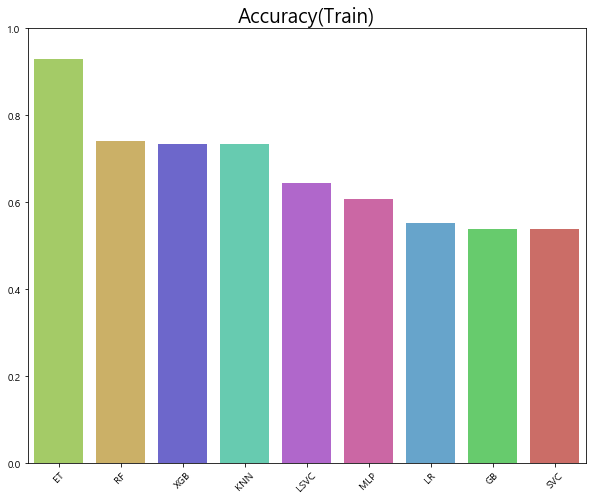

In [552]:
train_keys=sorted(train_dict,key=lambda x:train_dict[x],reverse=True)
train_values=sorted(train_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Accuracy(Train)',fontsize = 20)
plt.xticks(rotation=45)
plt.ylim((0,1))
sns.barplot(train_keys,train_values,palette=[color_dict[key] for key in train_keys]) # 그래프가 바뀌어도 분류기에 대한 색깔이 변치 않기위해

In [553]:
train_keys

['ET', 'RF', 'XGB', 'KNN', 'LSVC', 'MLP', 'LR', 'GB', 'SVC']

In [554]:
train_values

[0.9300699300699301,
 0.7412587412587412,
 0.7342657342657343,
 0.7342657342657343,
 0.6433566433566433,
 0.6083916083916084,
 0.5524475524475524,
 0.5384615384615384,
 0.5384615384615384]

In [555]:
for element in test_accuracy_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]
        if key.find('SVClassifier')>=0:        
            element['SVC'] = element[key]
            del element[key]

In [556]:
# color_dict= dict(zip(train_dict.keys(),sns.color_palette("hls", len(classifiers)+len(classifiers_not))))
# color_dict

In [576]:
k = {'a':1}
b = str(k.keys())

In [577]:
b
#Mlp, lr, lsvc, g, svc
['MLP','LR','LSVC','GB','SVC']

"dict_keys(['a'])"

In [579]:
test_accuracy_list

[{'RF': 0.5633802816901409},
 {'ET': 0.5915492957746479},
 {'GB': 0.5352112676056338},
 {'XGB': 0.5633802816901409},
 {'KNN': 0.5774647887323944},
 {'LR': 0.5352112676056338},
 {'LSVC': 0.6338028169014085},
 {'MLP': 0.6338028169014085},
 {'SVC': 0.5352112676056338}]

In [582]:
test_dict2 = Counter()
for mode in ['MLP','LR','LSVC','GB','SVC']:
    test_dict2[mode]=test_dict[mode]

In [583]:
test_dict2

Counter({'MLP': 0.6338028169014085,
         'LR': 0.5352112676056338,
         'LSVC': 0.6338028169014085,
         'GB': 0.5352112676056338,
         'SVC': 0.5352112676056338})

In [580]:
test_accuracy_list

[{'RF': 0.5633802816901409},
 {'ET': 0.5915492957746479},
 {'GB': 0.5352112676056338},
 {'XGB': 0.5633802816901409},
 {'KNN': 0.5774647887323944},
 {'LR': 0.5352112676056338},
 {'LSVC': 0.6338028169014085},
 {'MLP': 0.6338028169014085},
 {'SVC': 0.5352112676056338}]

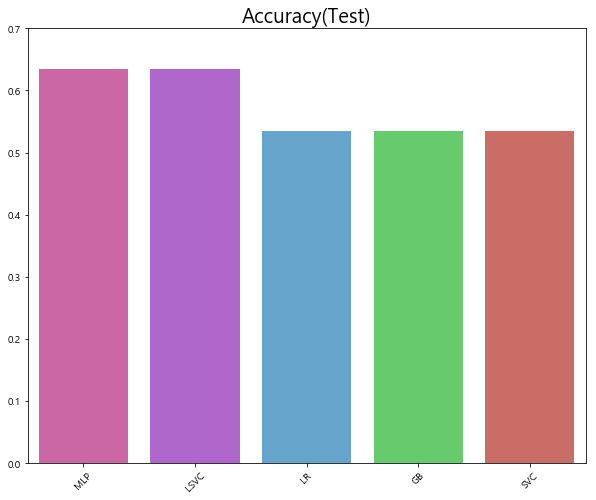

In [585]:
test_dict=Counter()
for element in test_accuracy_list:
    test_dict.update(element)
test_dict2 = Counter()
for mode in ['MLP','LR','LSVC','GB','SVC']:
    test_dict2[mode]=test_dict[mode]
test_keys=sorted(test_dict2.keys(),key=lambda x:test_dict[x],reverse=True)
test_values=sorted(test_dict2.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Accuracy(Test)',fontsize=20)
plt.xticks(rotation=45)
plt.ylim((0,0.7))
#plt.text(0,test_dict['Extratrees'],round(test_dict['Extratrees'],3),fontsize=20)
#plt.text(1,test_dict['Kneighbors'],round(test_dict['Kneighbors'],3),fontsize=20)
sns.barplot(test_keys,test_values,palette=[color_dict[key] for key in test_keys])

In [558]:
train_test1

Counter({'SVC': 0.00325027085590468,
         'RF': 0.3457106274007682,
         'ET': 0.3875701763025706,
         'GB': 0.43711218359105686,
         'KNN': 0.1568009455333399,
         'LR': 0.017236284841918637,
         'XGB': 0.23392100856889586,
         'LSVC': 0.009553826455234837,
         'MLP': 0.025411208509800054})

In [559]:
color_dict

{'SVC': (0.86, 0.3712, 0.33999999999999997),
 'RF': (0.86, 0.7178666666666667, 0.33999999999999997),
 'ET': (0.6554666666666664, 0.86, 0.33999999999999997),
 'GB': (0.33999999999999997, 0.86, 0.3712),
 'KNN': (0.33999999999999997, 0.86, 0.7178666666666667),
 'LR': (0.33999999999999997, 0.6554666666666664, 0.86),
 'XGB': (0.3712, 0.33999999999999997, 0.86),
 'LSVC': (0.7178666666666661, 0.33999999999999997, 0.86),
 'MLP': (0.86, 0.33999999999999997, 0.6554666666666664)}

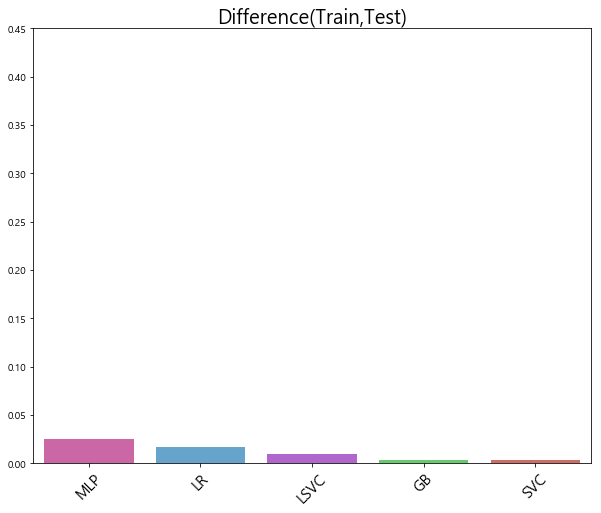

In [586]:
train_test1 = train_dict - test_dict
train_test2 =  test_dict - train_dict
train_test1.update(train_test2)
train_test_dict = train_test1
train_test_dict2=Counter()
for mode in ['MLP','LR','LSVC','GB','SVC']:
    train_test_dict2[mode]=train_test_dict[mode]
train_test_keys=sorted(train_test_dict2.keys(),key=lambda x:train_test_dict[x],reverse=True)
train_test_values=sorted(train_test_dict2.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Difference(Train,Test)',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.ylim((0,0.45))

sns.barplot(train_test_keys,train_test_values,palette=[color_dict[key] for key in train_test_keys])#gb et rf xgb

In [561]:
for element in precision_score_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]
        if key.find('SVClassifier')>=0:        
            element['SVC'] = element[key]
            del element[key]

In [ ]:
precision_score_list

In [590]:
precision_legend =['LSVC','MLP','LR','GB','SVC']

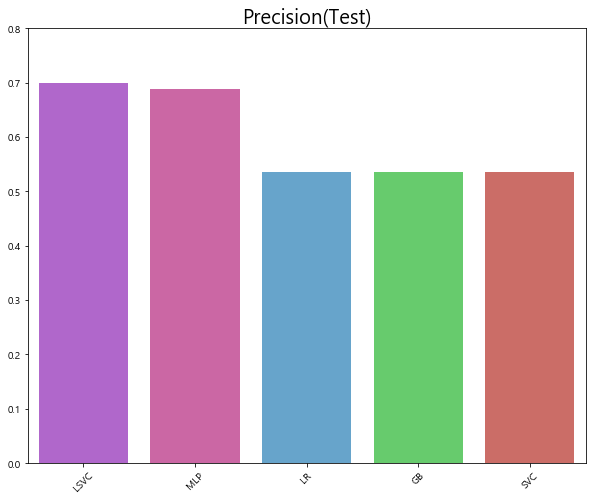

In [594]:
precision_score_dict={}
#model_list2 = ['MLP', 'LR', lsvc, g, svc]
for element in precision_score_list:
    
    precision_score_dict.update(element)
precision_score_dict2=Counter()
for mode in ['MLP','LR','LSVC','GB','SVC']:
    precision_score_dict2[mode]=precision_score_dict[mode]
precision_score_keys=sorted(precision_score_dict2.keys(),key=lambda x:precision_score_dict[x],reverse=True)
precision_score_values=sorted(precision_score_dict2.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Precision(Test)',fontsize=20)
plt.xticks(rotation=45)
plt.ylim((0,0.8))
#plt.text(1,precision_score_dict['Extratrees'],round(precision_score_dict['Extratrees'],3),fontsize=20)
#plt.text(0,precision_score_dict['Kneighbors'],round(precision_score_dict['Kneighbors'],3),fontsize=20)
#ax =sns.barplot(precision_score_keys,precision_score_values,palette=[color_dict[key] for key in precision_score_keys],hue=precision_legend)
#plt.setp(ax.get_legend().get_texts(), fontsize='18')
sns.barplot(precision_score_keys,precision_score_values,palette=[color_dict[key] for key in precision_score_keys])

In [563]:
train_dict

Counter({'RF': 0.7412587412587412,
         'ET': 0.9300699300699301,
         'GB': 0.5384615384615384,
         'XGB': 0.7342657342657343,
         'KNN': 0.7342657342657343,
         'LR': 0.5524475524475524,
         'LSVC': 0.6433566433566433,
         'MLP': 0.6083916083916084,
         'SVC': 0.5384615384615384})

In [564]:
test_dict

Counter({'RF': 0.5633802816901409,
         'ET': 0.5915492957746479,
         'GB': 0.5352112676056338,
         'XGB': 0.5633802816901409,
         'KNN': 0.5774647887323944,
         'LR': 0.5352112676056338,
         'LSVC': 0.6338028169014085,
         'MLP': 0.6338028169014085,
         'SVC': 0.5352112676056338})

In [506]:
# half_tt1 = train_dict-test_dict
# half_tt2 = test_dict - train_dict
# half_tt1.update(half_tt2)
# train_test_dict = half_tt1
# test_keys=sorted(train_test_dict.keys(),key=lambda x:train_test_dict[x],reverse=True)
# test_values=sorted(train_test_dict.values(),reverse=True)
# plt.figure(figsize=(10,8))
# plt.title('Difference(Train,Test)',fontsize=20)
# plt.xticks(rotation=45)
# sns.barplot(test_keys,test_values,palette=[color_dict[key] for key in test_keys])

### scaling 이전 end

In [531]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
precision_score_result=Counter()
precision_train_result = Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
#nfolds=5
nfolds=TimeSeriesSplit(n_splits=5)
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [1,3,5,10,50,100,200,500,1000]
learning_rate = [0.01,0.001]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]
linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }


ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }




rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,10)],
     'subsample':[i/100.0 for i in range(75,100,5)],     
    #'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100,1000],
    'n_estimators':n_estimators, 'random_state':random_state,
    'learning_rate' :learning_rate
}



#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
#gb et rf xgb knn
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(XGBClassifier(),param_grid=xgboost_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
#classifiers.append(GridSearchCV(SVC(), svc_param_grid, cv=nfolds,n_jobs=-1))
#classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
#classifiers.append(GridSearchCV(MLPClassifier(),mlp_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
#classifiers_not.append(LinearSVC(random_state=4000))
#classifiers_not.append(MLPClassifier(random_state=4000))
#classifiers_not.append(SVC(random_state=4000))
                   

#lsvc mlp gnb/ bnb


#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
precision_score_list = []
precision_train_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))  


    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
precision_score_result[stock_code]=precision_score_list
precision_train_result[stock_code]=precision_train_list



X_train_shape: (143, 2)
GridSearchCV : {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'n_estimators': 3, 'random_state': 4000}
GridSearchCV : {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 2, 'n_estimators': 3, 'random_state': 4000}
GridSearchCV : {'gamma': 0.6, 'learning_rate': 0.001, 'n_estimators': 5, 'random_state': 4000, 'subsample': 0.85}


In [532]:
train_result

Counter({'021240': [{'GridSearchCV': 0.7132867132867133},
          {'GridSearchCV': 0.6993006993006993},
          {'GridSearchCV': 0.7272727272727273}]})

In [533]:
test_result

Counter({'021240': [{'GridSearchCV': 0.5070422535211268},
          {'GridSearchCV': 0.5211267605633803},
          {'GridSearchCV': 0.5915492957746479}]})

In [534]:
precision_score_result

Counter({'021240': [{'GridSearchCV': 0.6},
          {'GridSearchCV': 0.6111111111111112},
          {'GridSearchCV': 0.576271186440678}]})

In [ ]:
X_train_shape: (143, 2)
RandomForest : {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'n_estimators': 500, 'random_state': 4000}
ExtraTree : {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'n_estimators': 1000, 'random_state': 4000}
GradientBoosting : {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.3, 'min_samples_leaf': 200, 'n_estimators': 500, 'random_state': 4000}
XGBoost : {'gamma': 0.3, 'learning_rate': 0.001, 'n_estimators': 500, 'random_state': 4000, 'subsample': 0.9}
GridSearchCV : {'n_neighbors': 5}
LinearSVC : LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=4000, tol=0.0001,
     verbose=0)
MLPClassifier : MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=4000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
SVC : SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=4000,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
precision_score_result=Counter()
precision_train_result = Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
#nfolds=5
nfolds=TimeSeriesSplit(n_splits=5)
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [1,3,5,10,50,100,200,500,1000]
learning_rate = [0.01,0.001]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]
linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }


ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }




rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,10)],
     'subsample':[i/100.0 for i in range(75,100,5)],     
    #'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100,1000],
    'n_estimators':n_estimators, 'random_state':random_state,
    'learning_rate' :learning_rate
}



#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
#gb et rf xgb knn
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(XGBClassifier(),param_grid=xgboost_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
#classifiers.append(GridSearchCV(SVC(), svc_param_grid, cv=nfolds,n_jobs=-1))
#classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
#classifiers.append(GridSearchCV(MLPClassifier(),mlp_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
#classifiers_not.append(LinearSVC(random_state=4000))
#classifiers_not.append(MLPClassifier(random_state=4000))
#classifiers_not.append(SVC(random_state=4000))
                   

#lsvc mlp gnb/ bnb


#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
precision_score_list = []
precision_train_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))  


    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
precision_score_result[stock_code]=precision_score_list
precision_train_result[stock_code]=precision_train_list

